# Weight of a person based on different factors in daily life - Regression

###### Link to the dataset : https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import sklearn
from sklearn.metrics import *

In [53]:
data=pd.read_csv('obesity')

In [54]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [55]:
data.drop('NObeyesdad',axis=1,inplace=True)

In [56]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [58]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

Text(0.5, 1.0, 'Height Histogram')

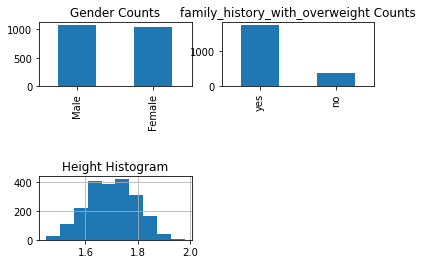

In [111]:
# Set up a grid of plots
fig_dims = (3, 2)

# Plot Gender counts
plt.subplot2grid(fig_dims, (0, 0))
data['Gender'].value_counts().plot(kind='bar', 
                                         title='Gender Counts')

# Plot family_history_with_overweight counts
plt.subplot2grid(fig_dims, (0, 1))
data['family_history_with_overweight'].value_counts().plot(kind='bar', 
                                         title='family_history_with_overweight Counts')


# Plot the Height histogram
plt.subplot2grid(fig_dims, (2,0))
data['Height'].hist()
plt.title('Height Histogram')

In [59]:
y=data['Weight']
X=data.drop('Weight',axis=1)

In [60]:
X.isnull().sum()

Gender                            0
Age                               0
Height                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

### Introducing 5% of random nan values

In [61]:
np.random.seed(1) # set random state
nan_matrix = np.random.random(X.shape)<0.06  # 0.05~0.1, (5~10%) whatever you want
nan_matrix

## Check [True/Total cells] ratio
unique, counts = np.unique(nan_matrix, return_counts=True) # There's a count function in unique
print(dict(zip(unique, counts))) # combine 2 nparray to a dictionary
print('ratio:',counts[1]/counts.sum())

## Set nan_matrix as condition to apply pd.mask changing X matrix with 6% NaN
X = X.mask(nan_matrix) # Note, second argument is 'other = something you want to substitute', but we left nothing here to generate NaN when nan_matrix cells are True.
X

{False: 29743, True: 1922}
ratio: 0.06069793147007737


,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,NaN,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,NaN
1,Female,21.000000,1.520000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,NaN,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,yes,no,2.0,3.0,Sometimes,NaN,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,no,no,NaN,3.0,Sometimes,no,2.000000,NaN,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,no,NaN,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,yes,NaN,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,NaN,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


# Embarking of values in the dataframe with one hot encoding and mapping

In [62]:
X['family_history_with_overweight'].unique()
X['family_history_with_overweight']=X['family_history_with_overweight'].map({'yes':1,'no':0})

In [63]:
X['FAVC'].unique()
X['FAVC']=X['FAVC'].map({'yes':1,'no':0})

In [64]:
X['CAEC'].unique()
X['CAEC']=X['CAEC'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})

In [65]:
X['SMOKE'].unique()
X['SMOKE']=X['SMOKE'].map({'yes':1,'no':0})

In [66]:
X['SCC'].unique()
X['SCC']=X['SCC'].map({'yes':1,'no':0})

In [67]:
X['CALC'].unique()
X['CALC']=X['CALC'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})

In [68]:
X['MTRANS'].unique()

array([nan, 'Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [69]:
cols1=pd.get_dummies(X.MTRANS,prefix='Transport')
X[cols1.columns]=cols1
X.drop(['MTRANS'],axis=1,inplace=True)

In [70]:
X.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,Female,21.0,NaN,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0,0,0,0,0
1,Female,21.0,1.52,1.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,NaN,1.0,0,0,0,1,0
2,Male,23.0,1.80,1.0,0.0,2.0,3.0,1.0,NaN,2.0,0.0,2.0,1.0,2.0,0,0,0,1,0
3,Male,27.0,1.80,0.0,0.0,NaN,3.0,1.0,0.0,2.0,NaN,2.0,0.0,2.0,0,0,0,0,1
4,Male,22.0,1.78,0.0,NaN,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0,0,0,1,0


In [71]:
X['Gender'].unique()
X['Gender']=X['Gender'].map({'Female':1,'Male':0})

In [72]:
X.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,1.0,21.0,NaN,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0,0,0,0,0
1,1.0,21.0,1.52,1.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,NaN,1.0,0,0,0,1,0
2,0.0,23.0,1.80,1.0,0.0,2.0,3.0,1.0,NaN,2.0,0.0,2.0,1.0,2.0,0,0,0,1,0
3,0.0,27.0,1.80,0.0,0.0,NaN,3.0,1.0,0.0,2.0,NaN,2.0,0.0,2.0,0,0,0,0,1
4,0.0,22.0,1.78,0.0,NaN,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0,0,0,1,0


# Imputing the missing values:

In [73]:
X['Gender'].value_counts()

0.0    1019
1.0     978
Name: Gender, dtype: int64

In [74]:
# As the frequency of 0 is more, replace nans with 0

In [75]:
X['Gender'].replace(np.nan,0,inplace=True)
X['Gender'].isnull().sum()

0

In [76]:
X['Age']=X['Age'].fillna(X['Age'].apply('mean'))

In [77]:
X['FCVC']=X['FCVC'].fillna(X['FCVC'].apply('mean'))

In [78]:
X['NCP']=X['NCP'].fillna(X['NCP'].apply('mean'))

In [79]:
X['CH2O']=X['CH2O'].fillna(X['CH2O'].apply('mean'))

In [80]:
X['FAF']=X['FAF'].fillna(X['FAF'].apply('mean'))

In [81]:
X['TUE']=X['TUE'].fillna(X['TUE'].apply('mean'))

In [82]:
X['Height']=X['Height'].fillna(X['Height'].apply('mean'))

In [83]:
X.isnull().sum()

Gender                               0
Age                                  0
Height                               0
family_history_with_overweight     125
FAVC                               123
FCVC                                 0
NCP                                  0
CAEC                               131
SMOKE                              131
CH2O                                 0
SCC                                125
FAF                                  0
TUE                                  0
CALC                               142
Transport_Automobile                 0
Transport_Bike                       0
Transport_Motorbike                  0
Transport_Public_Transportation      0
Transport_Walking                    0
dtype: int64

In [84]:
X['family_history_with_overweight'].value_counts()

1.0    1620
0.0     366
Name: family_history_with_overweight, dtype: int64

In [85]:
X['family_history_with_overweight'].replace(np.nan,1,inplace=True)
X['family_history_with_overweight'].isnull().sum()

0

In [86]:
X['FAVC'].value_counts()

1.0    1761
0.0     227
Name: FAVC, dtype: int64

In [87]:
X['FAVC'].replace(np.nan,1,inplace=True)
X['FAVC'].isnull().sum()

0

In [88]:
X['CAEC'].value_counts()

1.0    1651
2.0     230
0.0      50
3.0      49
Name: CAEC, dtype: int64

In [89]:
X['CAEC'].replace(np.nan,1,inplace=True)
X['CAEC'].isnull().sum()

0

In [90]:
X['SMOKE'].value_counts()

0.0    1938
1.0      42
Name: SMOKE, dtype: int64

In [91]:
X['SMOKE'].replace(np.nan,1,inplace=True)
X['SMOKE'].isnull().sum()

0

In [92]:
X['SCC'].value_counts()

0.0    1897
1.0      89
Name: SCC, dtype: int64

In [93]:
X['SCC'].replace(np.nan,0,inplace=True)
X['SCC'].isnull().sum()

0

In [94]:
X['CALC'].value_counts()

1.0    1302
0.0     601
2.0      65
3.0       1
Name: CALC, dtype: int64

In [95]:
X['CALC'].replace(np.nan,1,inplace=True)
X['CALC'].isnull().sum()

0

In [96]:
X.isnull().sum()

Gender                             0
Age                                0
Height                             0
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
Transport_Automobile               0
Transport_Bike                     0
Transport_Motorbike                0
Transport_Public_Transportation    0
Transport_Walking                  0
dtype: int64

In [97]:
corrd=X.corr()

<AxesSubplot:>

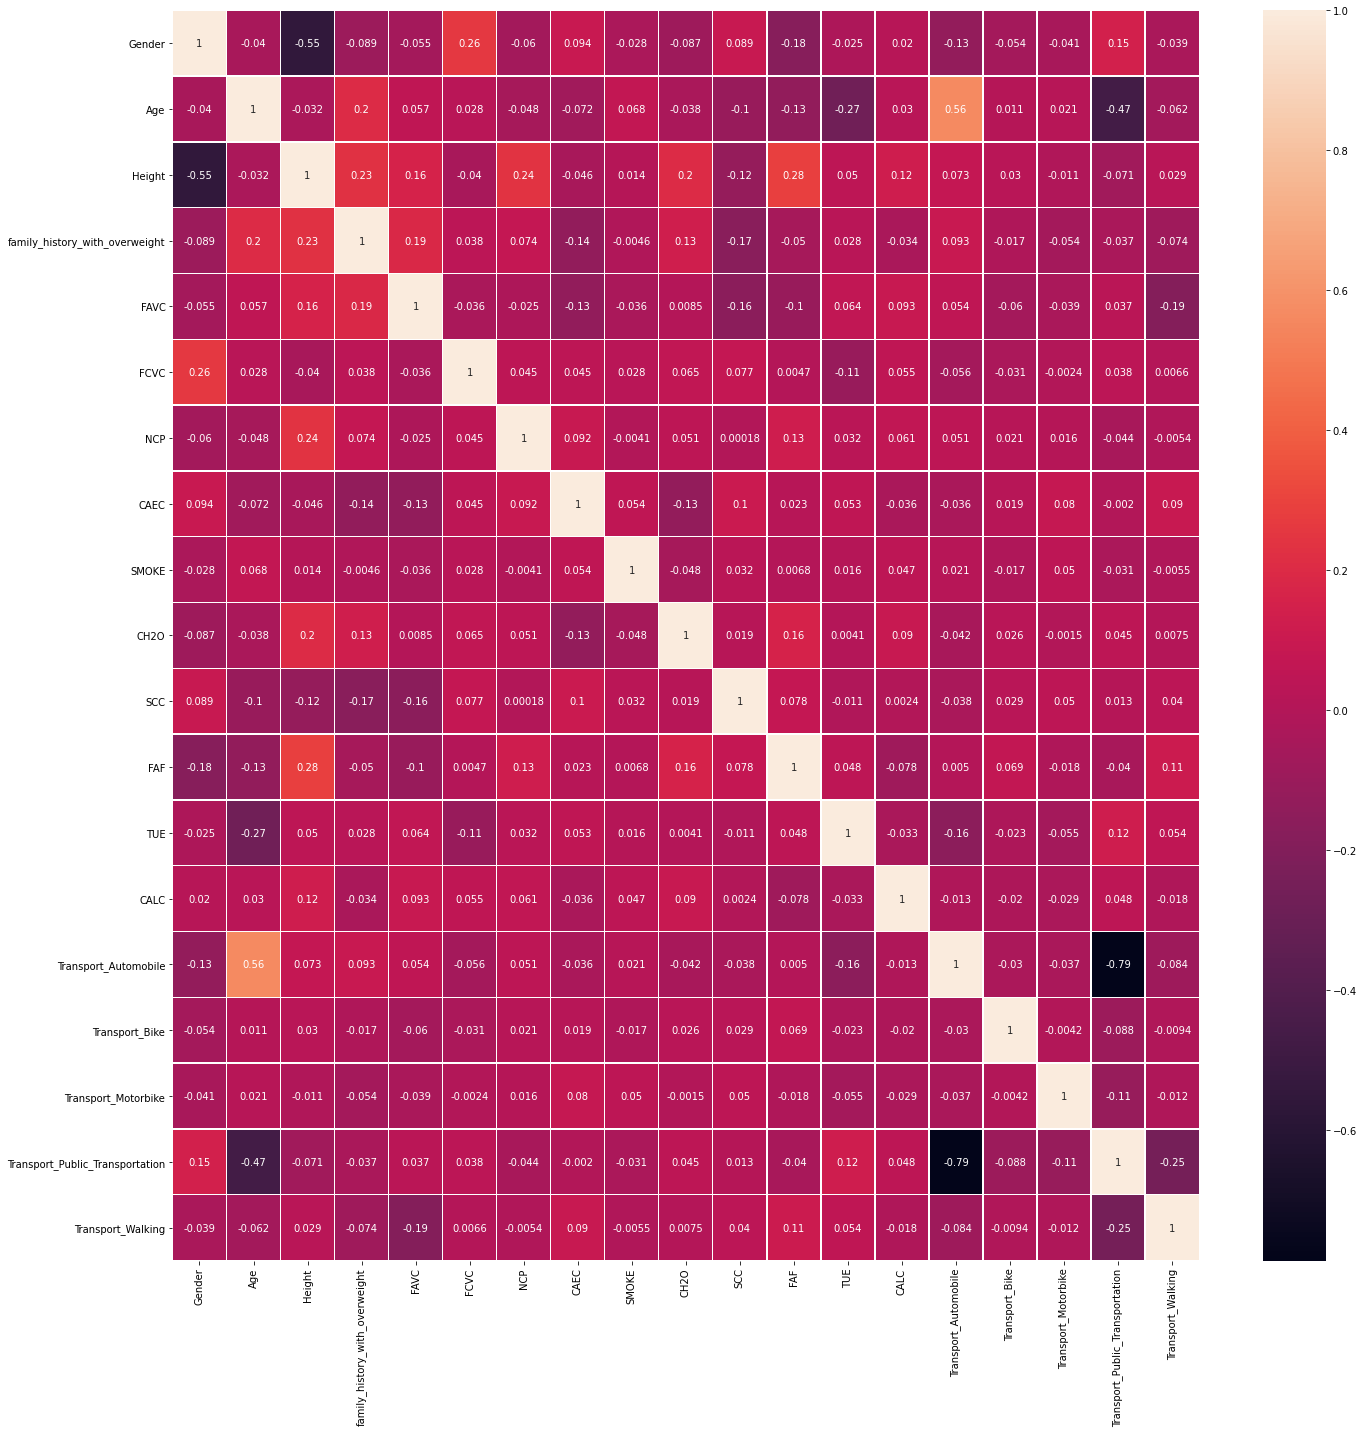

In [98]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(23,23)) 
sns.heatmap(corrd,annot=True,linewidths=0.30, ax=ax)

### The variables Age and Transport_Automobile are highly correlated with correlation of 0.56. We can use feature selection to remove the correlated features.

In [99]:
X_train_org,X_test_org,y_train,y_test=train_test_split(X,y,random_state=0)

### Standard Scaler is being used because most of the values are between 0 and 1 and so they are normally distributed.

In [100]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

# KNN regressor:

In [93]:
## Grid Search with Cross- Validation
max_class = np.max(np.bincount(y))
param_grid_knn={'n_neighbors': range(1, 10)}
print(" Parameter grid for KNN is: {}".format(param_grid_knn))

 Parameter grid for KNN is: {'n_neighbors': range(1, 10)}


In [101]:
grid_search_knn=GridSearchCV(KNeighborsRegressor(),param_grid_knn,scoring='r2',return_train_score=True,n_jobs=-1,refit='r2')

In [102]:
grid_search_knn.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10)}, refit='r2',
             return_train_score=True, scoring='r2')

In [107]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best r2 score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'n_neighbors': 6}
Best r2 score: 0.72


## Scatter plot of weight predictions versus actual values:

Text(0, 0.5, 'Weight')

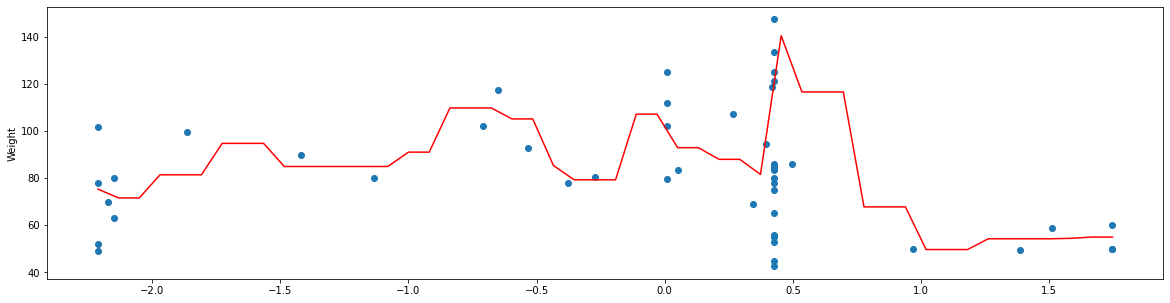

In [114]:
X_b = X_train[:50,6].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(2)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.ylabel('Weight')

# Linear Regression:

In [122]:
lreg =sm.OLS(y_train, X_train).fit()

In [117]:
lreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.043
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              3.732
Date:                Mon, 12 Oct 2020   Prob (F-statistic):                    1.02e-07
Time:                        08:15:22   Log-Likelihood:                         -9344.7
No. Observations:                1583   AIC:                                  1.873e+04
Df Residuals:                    1564   BIC:                                  1.883e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5953      2.904      0.549      0.583      -4.100       7.291
x2             5.2530      2.951      1.780      0.075      -0.536      11.042
x3            10.8721      3.075      3.535      0.000       4.840      16.905
x4             7.8507      2.459      3.192      0.001       3.027      12.674
x5             2.1701      2.438      0.890      0.374      -2.612       6.952
x6             4.8318      2.388      2.024      0.043       0.148       9.515
x7             0.5520      2.353      0.235      0.815      -4.063       5.167
x8            -4.4309      2.364     -1.874      0.061      -9.069       0.207
x9            -0.1246      2.262     -0.055      0.956      -4.561       4.312
x10            0.9296      2.354      0.395      0.693      -3.688       5.547
x11           -1.5888      2.340     -0.679      0.497      -6.178       3.001
x12           -2.5077      2.449     -1.024      0.306      -7.311       2.296
x13           -0.8500      2.369     -0.359      0.720      -5.497       3.797
x14            2.8289      2.314      1.222      0.222      -1.711       7.369
x15           -4.6183      4.572     -1.010      0.313     -13.587       4.350
x16           -0.3328      2.344     -0.142      0.887      -4.930       4.264
x17           -0.3689      2.355     -0.157      0.876      -4.988       4.251
x18           -0.0408      4.544     -0.009      0.993      -8.954       8.872
x19           -0.9251      2.782     -0.333      0.739      -6.381       4.531
==============================================================================
Omnibus:                        3.711   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                4.069
Skew:                          -0.036   Prob(JB):                        0.131
Kurtosis:                       3.237   Cond. No.                         4.47
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
lreg1 = LinearRegression()
lreg1.fit(X_train, y_train)
print(lreg1.score(X_train, y_train))
print(lreg1.score(X_test, y_test))

0.5274427619488595
0.5211063199184983


## Scatter plot of Train data vs predicted values:

Text(0.5, 0, 'RM')

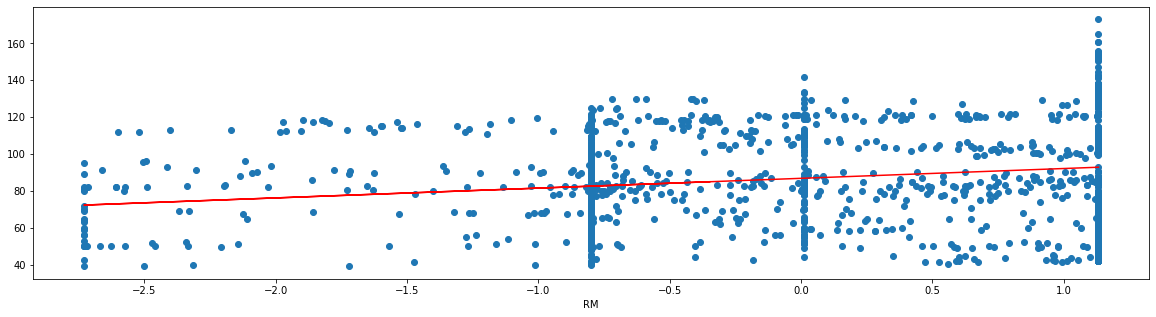

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg1.fit(X_train_rm, y_train)
y_predict = lreg1.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

# Ridge Regression:

In [132]:
param_grid_ridge={'alpha':[0.01, 0.1, 1, 10, 100]}
print(" Parameter grid for Ridge is: {}".format(param_grid_ridge))

 Parameter grid for Ridge is: {'alpha': [0.01, 0.1, 1, 10, 100]}


In [127]:
grid_search_ridge=GridSearchCV(Ridge(),param_grid_ridge,scoring='r2',return_train_score=True,n_jobs=-1,refit='r2')

In [128]:
grid_search_ridge.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, refit='r2',
             return_train_score=True, scoring='r2')

In [130]:
print("Best parameters: {}".format(grid_search_ridge.best_params_))
print("Best r2 score: {:.2f}".format(grid_search_ridge.best_score_))

Best parameters: {'alpha': 10}
Best r2 score: 0.52


In [129]:
train_score_list = []
test_score_list = []

for alpha in [0.01, 0.1, 1, 10, 100]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,  y_train)
    train_score_list.append(ridge.score(X_train, y_train))
    test_score_list.append(ridge.score(X_test, y_test))

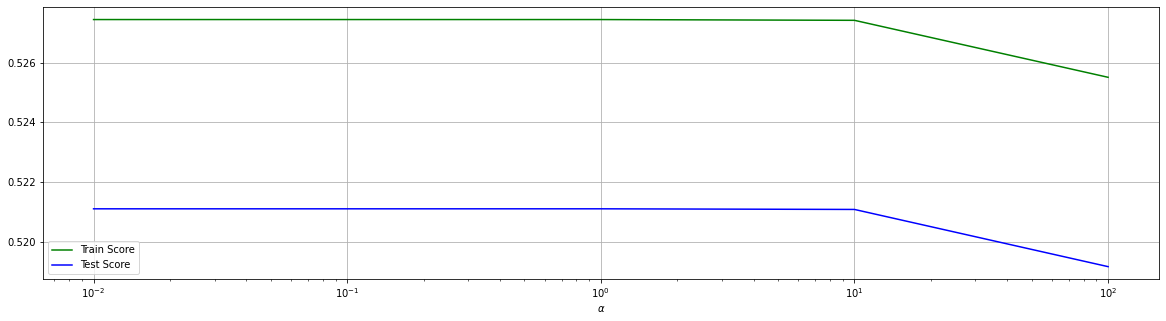

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

# Lasso Regression:

In [133]:
param_grid_lasso={'alpha':[0.01, 0.1, 1, 10, 100]}
print(" Parameter grid for Lasso is: {}".format(param_grid_lasso))

 Parameter grid for Lasso is: {'alpha': [0.01, 0.1, 1, 10, 100]}


In [134]:
grid_search_lasso=GridSearchCV(Lasso(),param_grid_lasso,scoring='r2',return_train_score=True,n_jobs=-1,refit='r2')

In [135]:
grid_search_lasso.fit(X_train,y_train)

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, refit='r2',
             return_train_score=True, scoring='r2')

In [136]:
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best r2 score: {:.2f}".format(grid_search_lasso.best_score_))

Best parameters: {'alpha': 0.1}
Best r2 score: 0.52


In [131]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

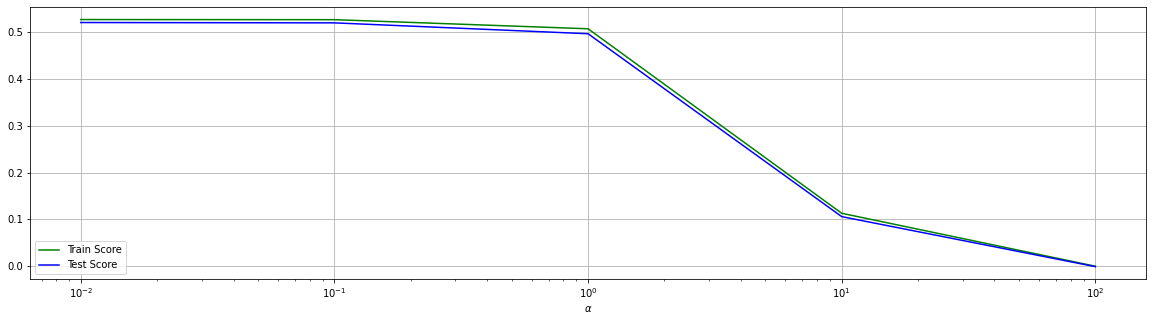

In [132]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

# Polynomial Regression:

In [123]:
from sklearn.model_selection import cross_val_score 
degrees = [2,3,4,5,6] # Change degree "hyperparameter" here
best_score = 0
best_degree = 0
for degree in degrees:
    poly_features = PolynomialFeatures(degree = degree)
    X_train_poly = poly_features.fit_transform(X_train)
    polynomial_regressor = LinearRegression()
    polynomial_regressor.fit(X_train_poly, y_train)
    scores = cross_val_score(polynomial_regressor, X_train_poly, y_train,scoring='r2', cv=5) # Change k-fold cv value here
    score=np.mean(scores)
    if score > best_score:
        best_score = score
        best_degree = degree

In [229]:
print(score)

-66305.29770220931


# LinearSVR

In [156]:
param_grid_lsvr ={'C':[0.01, 0.1, 1, 10, 100]}
print(" Parameter grid for linear SVR is: {}".format(param_grid_lsvr))

 Parameter grid for linear SVR is: {'C': [0.01, 0.1, 1, 10, 100]}


In [167]:
grid_search_lsvr=GridSearchCV(LinearSVR(max_iter=10000),param_grid_lsvr,scoring='r2',return_train_score=True,n_jobs=-1,refit='r2')

In [174]:
grid_search_lsvr.fit(X_train,y_train_org)

GridSearchCV(estimator=LinearSVR(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, refit='r2',
             return_train_score=True, scoring='r2')

In [175]:
print("Best parameters: {}".format(grid_search_lsvr.best_params_))
print("Best r2 score: {:.2f}".format(grid_search_lsvr.best_score_))

Best parameters: {'C': 1}
Best r2 score: 0.50


# Kernelized SVR

In [54]:
param_grid_ksvr={'C':[0.01, 0.1, 1, 10, 100],
                'kernel':['rbf','poly','linear']}
print(" Parameter grid for kernel SVR is: {}".format(param_grid_ksvr))

 Parameter grid for kernel SVR is: {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf', 'poly', 'linear']}


In [55]:
grid_search_ksvr=GridSearchCV(SVR(),param_grid_ksvr,scoring='r2',return_train_score=True,n_jobs=-1,refit='r2')

In [58]:
grid_search_ksvr.fit(X_train,y_train)

GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'linear']},
             refit='r2', return_train_score=True, scoring='r2')

In [59]:
print("Best parameters: {}".format(grid_search_ksvr.best_params_))
print("Best R-2 score: {:.2f}".format(grid_search_ksvr.best_score_))

Best parameters: {'C': 100, 'kernel': 'rbf'}
Best R-2 score: 0.78


# Decision Tree Regressor:

In [60]:
param_grid_dtr={'criterion':["mse", "friedman_mse", "mae"],
               'max_depth':[1,2,3,4,5,6,7,8,9,10]}
print(" Parameter grid for Decision Tree Regressor is: {}".format(param_grid_dtr))

 Parameter grid for Decision Tree Regressor is: {'criterion': ['mse', 'friedman_mse', 'mae'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [61]:
grid_search_dtr=GridSearchCV(DecisionTreeRegressor(),param_grid_dtr,scoring='r2',return_train_score=True,n_jobs=-1,refit='r2')

In [64]:
grid_search_dtr.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             refit='r2', return_train_score=True, scoring='r2')

In [65]:
print("Best parameters: {}".format(grid_search_dtr.best_params_))
print("Best r-2: {:.2f}".format(grid_search_dtr.best_score_))

Best parameters: {'criterion': 'friedman_mse', 'max_depth': 7}
Best r-2: 0.65


Text(0.5, 0, 'Weight')

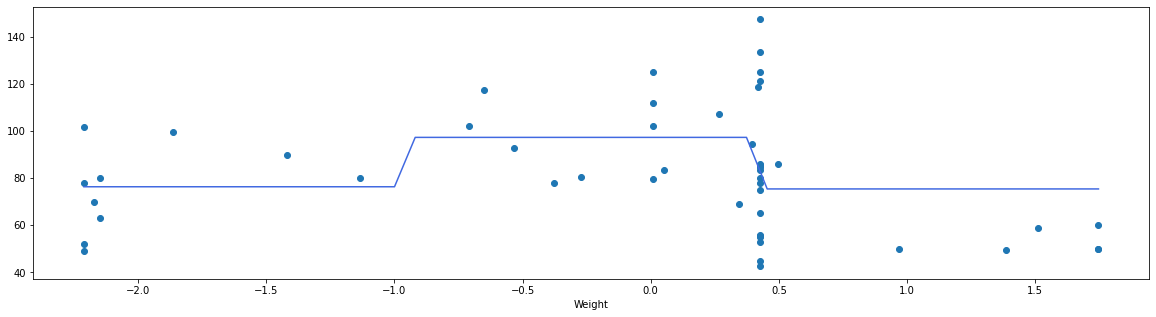

In [128]:
X_b = X_train[:50,6].reshape(-1,1)
y_b = y_train[:50]

clf = DecisionTreeRegressor(min_samples_leaf=10)
clf.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clf.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)
plt.xlabel('Weight')

# Selecting the best model based on the R-squared score.

### Kernelized SVM provides the best R2-score with 78% as its value. So, we fit the data to Kernelized SVM to predict values:

In [103]:
ksvr = SVR(C=100,kernel='rbf')
ksvr.fit(X_train, y_train)
print(ksvr.score(X_train, y_train))
print(ksvr.score(X_test, y_test))

0.8975993710791796
0.7979385612328386


## Predicting the target values for the Test Data:

In [105]:
y_pred=ksvr.predict(X_test)
predictions=pd.DataFrame(y_pred,columns=['weight'])
predictions

,weight
0,127.746245
1,66.975504
2,81.646762
3,131.360488
4,132.934819
...,...
523,49.358116
524,125.869444
525,87.971759
526,124.250603


### The Train and Test scores for the best fit model are:
### Train Score : 0.8975993710791796
### Test Score : 0.7979385612328386
### R-2 score is : 0.78

### Conclusion : 78% of the variation in the dependent variables is explained by the independent variables of the model. The remaining is by unexplained factors.